In [1]:
import pandas as pd
import statistics
import ast
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np


In [2]:
movies = pd.read_csv('../data/movies_2015_2024.csv')
movies

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID
0,Avengers: Age of Ultron,2015,"['Action', 'Adventure', 'Science Fiction']",7.271,23855,365000000,1405403694,99861
1,Mad Max: Fury Road,2015,"['Action', 'Adventure', 'Science Fiction']",7.627,23511,150000000,378858340,76341
2,Inside Out,2015,"['Animation', 'Family', 'Adventure', 'Drama', ...",7.910,22924,175000000,857611174,150540
3,Jurassic World,2015,"['Action', 'Adventure', 'Science Fiction', 'Th...",6.699,21102,150000000,1671537444,135397
4,The Martian,2015,"['Drama', 'Adventure', 'Science Fiction']",7.691,20590,108000000,631058917,286217
...,...,...,...,...,...,...,...,...
1002,Drive My Car,2021,['Drama'],7.400,1407,1300000,15356046,758866
1003,TÁR,2022,"['Music', 'Drama']",7.090,1426,35000000,29048571,817758
1004,Women Talking,2022,['Drama'],6.861,661,20000000,7589419,777245
1005,Maestro,2023,"['Drama', 'Romance', 'Music']",6.292,791,80000000,300000,523607


In [3]:
cpi_data = pd.read_csv('../data/CPI_data.csv').set_index('Year')
budget_2024 = []
for year,budget in zip(movies['Year'], movies['Budget']):
    budget_adjusted = budget*(cpi_data.loc[2024,'CPI'] / cpi_data.loc[year,'CPI'])
    budget_2024.append(budget_adjusted)
# Reassign adjusted budget numbers to the Budget column
movies['Budget'] = budget_2024
revenue_2024 = []
for year,revenue in zip(movies['Year'], movies['Revenue']):
    revenue_adjusted = revenue*(cpi_data.loc[2024,'CPI'] / cpi_data.loc[year,'CPI'])
    revenue_2024.append(revenue_adjusted)
# Reassign adjusted budget numbers to the Revenue column
movies['Revenue'] = revenue_2024

movies = movies[~((movies['Revenue'].round() == 0.0) | (movies['Budget'].round() == 0.0))]

## What is the average profit margin (revenue - budget) across genres or years?

In [4]:
#first set a column to represent the difference in revenue and budgets
movies['difference'] = movies['Revenue']-movies['Budget'] 
movies['difference']

/var/folders/h8/51mqc9v517x00_mhcb5s7ncw0000gn/T/ipykernel_12920/3947696349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['difference'] = movies['Revenue']-movies['Budget']


0       1.376961e+09
1       3.028911e+08
2       9.034273e+08
3       2.013736e+09
4       6.922619e+08
            ...     
1002    1.627201e+07
1003   -6.379176e+06
1004   -1.330257e+07
1005   -8.205070e+07
1006   -2.018362e+07
Name: difference, Length: 805, dtype: float64

In [5]:
#take the means grouped by the years
average_profit_margin_year = movies.groupby('Year')['difference'].mean().reset_index()

In [6]:
#convert to dollar amount
average_profit_margin_year['Average Profit by Year'] = average_profit_margin_year['difference'].apply(lambda x: f"${x:,.2f}")
average_profit_margin_year

,Year,difference,Average Profit by Year
0,2015,2.481097e+08,"$248,109,663.16"
1,2016,2.524212e+08,"$252,421,164.07"
2,2017,2.684345e+08,"$268,434,546.51"
3,2018,2.816655e+08,"$281,665,458.04"
4,2019,2.940398e+08,"$294,039,765.58"
5,2020,3.472341e+07,"$34,723,411.83"
6,2021,9.139084e+07,"$91,390,838.16"
7,2022,1.662923e+08,"$166,292,279.49"
8,2023,1.367772e+08,"$136,777,200.88"
9,2024,1.440857e+08,"$144,085,706.29"


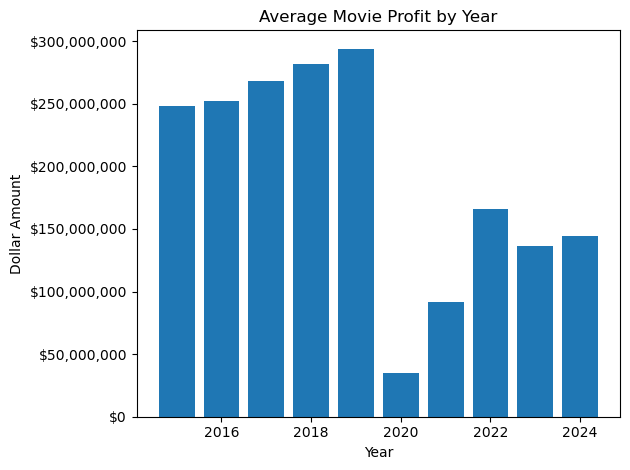

In [7]:
# Create a single plot with the data from average_profit_margin_year
fig, ax = plt.subplots()

# Use the data from average_profit_margin_year for the plot
# Changed from using undefined x, y variables to using the DataFrame columns
ax.bar(average_profit_margin_year['Year'], average_profit_margin_year['difference'])

# Apply the dollar amount formatter to the y-axis
formatter = mticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.ylabel("Dollar Amount")
plt.title('Average Movie Profit by Year')
plt.xlabel('Year')

plt.tight_layout()
plt.savefig('../assets/Average_Profit_by_Year', dpi = 150);

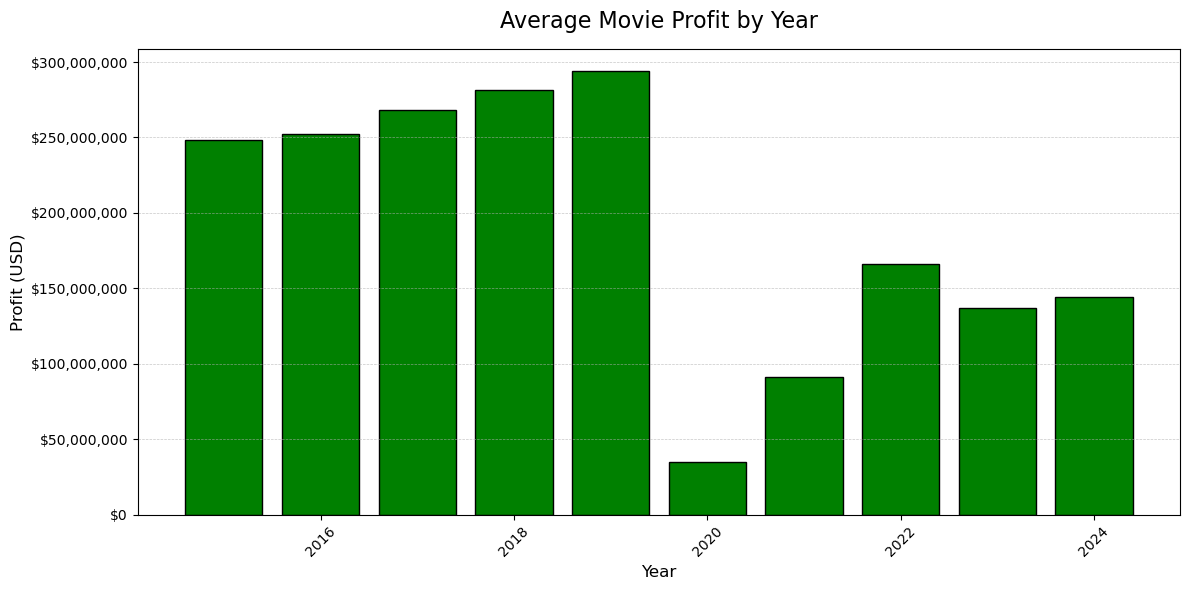

In [18]:
# Create a cleaner and more professional chart
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(
    average_profit_margin_year['Year'],
    average_profit_margin_year['difference'],
    color='green',
    edgecolor='black'
)

# Format y-axis as dollars
formatter = mticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Improve readability
ax.set_title('Average Movie Profit by Year', fontsize=16, pad=15)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Profit (USD)', fontsize=12)

# Rotate x labels
plt.xticks(rotation=45)

# Add subtle gridlines
ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Tight layout for clean spacing
plt.tight_layout()

plt.savefig('../assets/Average_Profit_by_Year', dpi=150)
plt.show()


In [9]:
# Convert Genre column to list type so that it can be exploded
movies['Genre'] = movies['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

/var/folders/h8/51mqc9v517x00_mhcb5s7ncw0000gn/T/ipykernel_12920/266153323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Genre'] = movies['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)


In [10]:
#explode the genres list
movies_exploded = movies.explode('Genre', ignore_index = False)

In [11]:
average_profit_margin_genre = movies_exploded.groupby('Genre')['difference'].mean().reset_index()

In [12]:
#convert to dollar amount
average_profit_margin_genre['Average Profit by Genre'] = average_profit_margin_genre['difference'].apply(lambda x: f"${x:,.2f}")
average_profit_margin_genre

,Genre,difference,Average Profit by Genre
0,Action,2.914493e+08,"$291,449,322.57"
1,Adventure,3.670457e+08,"$367,045,678.23"
2,Animation,4.137699e+08,"$413,769,901.90"
3,Comedy,2.145015e+08,"$214,501,546.73"
4,Crime,1.383934e+08,"$138,393,408.85"
5,Drama,1.085831e+08,"$108,583,128.92"
6,Family,3.916999e+08,"$391,699,923.44"
7,Fantasy,2.533191e+08,"$253,319,140.43"
8,History,7.465686e+07,"$74,656,859.22"
9,Horror,1.012453e+08,"$101,245,314.03"


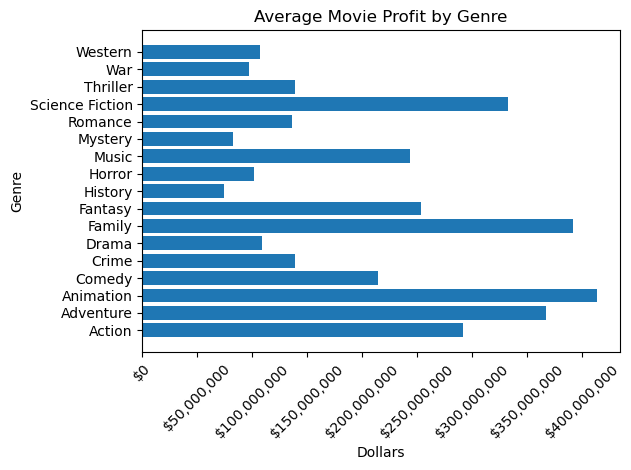

In [13]:
plt.barh(
    y=average_profit_margin_genre['Genre'],
    width=average_profit_margin_genre['difference']
)

formatter = mticker.StrMethodFormatter('${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Average Movie Profit by Genre')
plt.xlabel('Dollars')
plt.xticks(rotation=45)
plt.ylabel('Genre');

plt.tight_layout()
plt.savefig('../assets/Average_Profit_by_genre', dpi = 150);

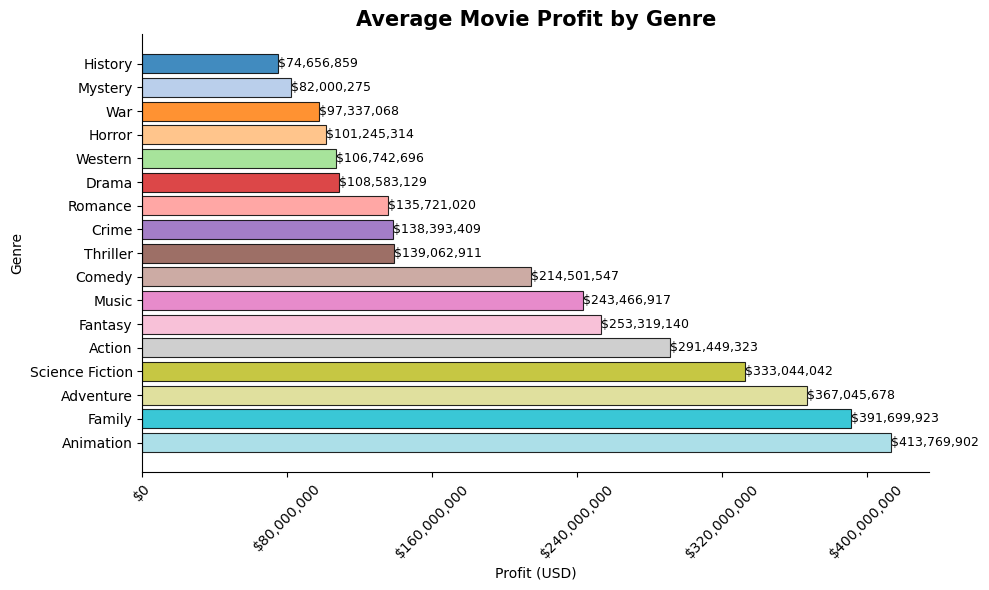

In [17]:
# Sort the data for cleaner display
data = average_profit_margin_genre.sort_values('difference')

fig, ax = plt.subplots(figsize=(10, 6))

# Generate a colorful range of colors (change 'tab20' to another cmap if desired)
colors = plt.cm.tab20(np.linspace(0, 1, len(data)))

# Create horizontal bar chart
ax.barh(
    data['Genre'],
    data['difference'],
    edgecolor='black',
    linewidth=0.8,
    alpha=0.85,
    color = colors
)

# Dollar formatting
formatter = mticker.StrMethodFormatter('${x:,.0f}')
ax.xaxis.set_major_formatter(formatter)

# Limit the number of ticks automatically
ax.xaxis.set_major_locator(mticker.MaxNLocator(6))

# Rotate tick labels to prevent overlap
plt.xticks(rotation=45)

# Add value labels at the end of each bar
for i, val in enumerate(data['difference']):
    ax.text(
        val,
        i,
        f'${val:,.0f}',
        va='center',
        ha='left',
        fontsize=9
    )

# Titles and labels
ax.set_title('Average Movie Profit by Genre', fontsize=15, fontweight='bold')
ax.set_xlabel('Profit (USD)')
ax.set_ylabel('Genre')

# Largest value at the top
ax.invert_yaxis()

# Clean up chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Improve spacing
plt.tight_layout()

# Save and show
plt.savefig('../assets/Average_Profit_by_genre', dpi=150)
plt.show()